/tmp/ipython-input-4-1860645211.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Media3'] = df['Fechamento'].rolling(window=3).mean().fillna(method='bfill')
/tmp/ipython-input-4-1860645211.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Media5'] = df['Fechamento'].rolling(window=5).mean().fillna(method='bfill')


🎯 Acurácia Regressão Logística:
Treino: 50.76%
Teste: 36.67%

📊 Classification Report (Teste):
               precision    recall  f1-score   support

           0       0.37      1.00      0.54        11
           1       0.00      0.00      0.00        19

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

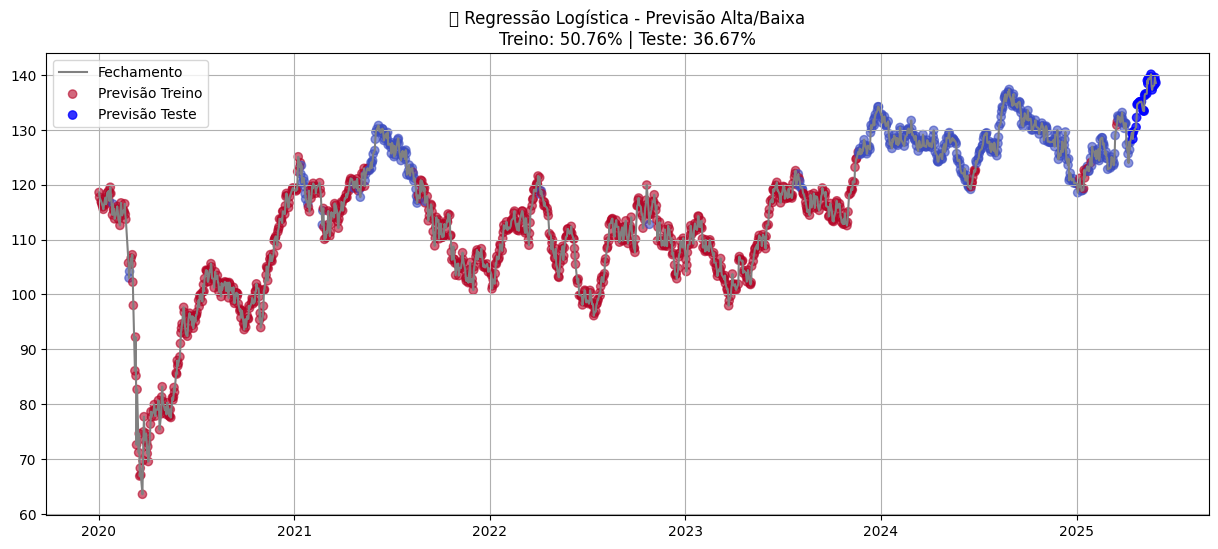

In [4]:
# Regressão Logística para prever alta/baixa do fechamento

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ===== 1. Carregar dados
df = pd.read_csv('/content/Ibovespa 02-01-2020_a_30-05-2025_ajustado.csv')  # atualize o nome conforme seu arquivo
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df.sort_values('Data').reset_index(drop=True)

# ===== 2. Criar variável alvo binária (1 = alta, 0 = queda)
df['Fechamento_amanha'] = df['Fechamento'].shift(-1)
df['Target'] = (df['Fechamento_amanha'] > df['Fechamento']).astype(int)
df = df.dropna().copy()

# ===== 3. Engenharia de atributos simples
df['Retorno'] = df['Fechamento'].pct_change().fillna(0)
df['Retorno_1'] = df['Retorno'].shift(1).fillna(0)
df['Media3'] = df['Fechamento'].rolling(window=3).mean().fillna(method='bfill')
df['Media5'] = df['Fechamento'].rolling(window=5).mean().fillna(method='bfill')
df['Volatilidade3'] = df['Retorno'].rolling(3).std().fillna(0)

# ===== 4. Features e target
X = df[['Retorno_1', 'Media3', 'Media5', 'Volatilidade3']]
y = df['Target']

# ===== 5. Separar treino e teste (últimos 30 dias para teste)
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]

# ===== 6. Modelo: Regressão Logística
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# ===== 7. Previsões e métricas
y_pred_train = modelo_log.predict(X_train)
y_pred_test = modelo_log.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"🎯 Acurácia Regressão Logística:")
print(f"Treino: {acc_train:.2%}")
print(f"Teste: {acc_test:.2%}")
print("\n📊 Classification Report (Teste):\n", classification_report(y_test, y_pred_test))

# ===== 8. Gráfico combinado
df['previsao_train'] = np.nan
df['previsao_test'] = np.nan
df.loc[X_train.index, 'previsao_train'] = y_pred_train
df.loc[X_test.index, 'previsao_test'] = y_pred_test

plt.figure(figsize=(15, 6))
plt.plot(df['Data'], df['Fechamento'], label='Fechamento', color='gray')
plt.scatter(df.loc[X_train.index, 'Data'], df.loc[X_train.index, 'Fechamento'],
            c=df.loc[X_train.index, 'previsao_train'], cmap='coolwarm',
            label='Previsão Treino', alpha=0.6)
plt.scatter(df.loc[X_test.index, 'Data'], df.loc[X_test.index, 'Fechamento'],
            c=df.loc[X_test.index, 'previsao_test'], cmap='bwr',
            label='Previsão Teste', alpha=0.8)
plt.title(f"📘 Regressão Logística - Previsão Alta/Baixa\nTreino: {acc_train:.2%} | Teste: {acc_test:.2%}")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score

# Concatenar verdadeiros e preditos de treino e teste
y_true_total = np.concatenate([y_train, y_test])
y_pred_total = np.concatenate([y_pred_train, y_pred_test])

acc_total = accuracy_score(y_true_total, y_pred_total)

print(f"Modelo Regressão Logística: Acurácia combinada (treino + teste): {acc_total:.2%}")


Modelo Regressão Logística: Acurácia combinada (treino + teste): 50.45%


📆 Split 1: Acurácia = 55.80%
📆 Split 2: Acurácia = 45.54%
📆 Split 3: Acurácia = 54.46%
📆 Split 4: Acurácia = 47.77%
📆 Split 5: Acurácia = 53.12%

🎯 Acurácia média com TimeSeriesSplit: 51.34%


/tmp/ipython-input-6-2366867624.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


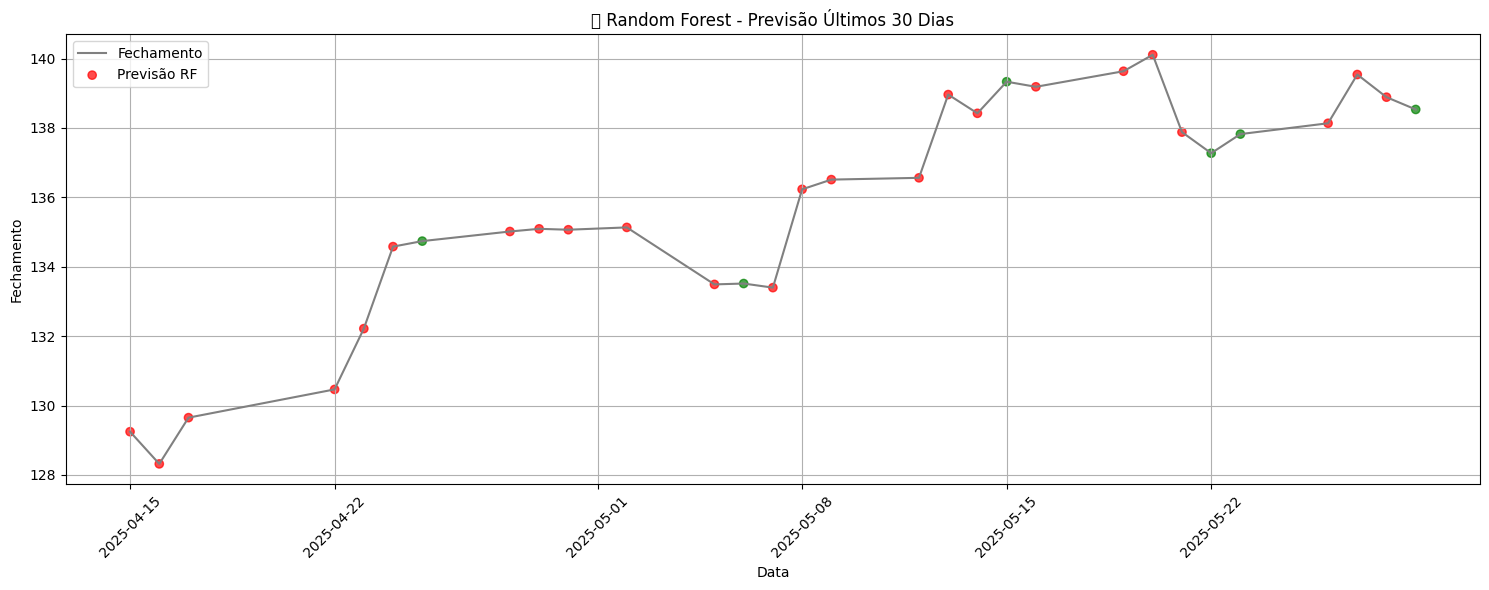

In [6]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# TimeSeriesSplit com 5 divisões
tscv = TimeSeriesSplit(n_splits=5)
scores = []

# Loop pelos splits
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    modelo = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    )
    modelo.fit(X_train_cv, y_train_cv)
    y_pred_cv = modelo.predict(X_test_cv)
    acc = accuracy_score(y_test_cv, y_pred_cv)
    scores.append(acc)

    print(f"📆 Split {i+1}: Acurácia = {acc:.2%}")

# Acurácia média
media = np.mean(scores)
print(f"\n🎯 Acurácia média com TimeSeriesSplit: {media:.2%}")

# Adiciona as previsões ao DataFrame original
df['Previsao_RF'] = np.nan
df.loc[X.index, 'Previsao_RF'] = modelo.predict(X)

# Define um intervalo de datas para o gráfico — ex: últimos 60 dias
ultimos_dias = 30
df_grafico = df.tail(ultimos_dias)

# Mapeia cores: 0 (queda) = vermelho, 1 (alta) = verde
cores = df_grafico['Previsao_RF'].map({0: 'red', 1: 'green'})

# Plota
plt.figure(figsize=(15, 6))
plt.plot(df_grafico['Data'], df_grafico['Fechamento'], label='Fechamento', color='gray')
plt.scatter(df_grafico['Data'], df_grafico['Fechamento'],
            c=cores, label='Previsão RF', alpha=0.7)
plt.title(f"📈 Random Forest - Previsão Últimos {ultimos_dias} Dias")
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
